In [9]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import matplotlib.pyplot as plt

In [10]:
#Reading the data from the csv file
data0 = pd.read_csv('UniversityAffiliations.csv',sep=',',encoding="ISO-8859-1")

In [11]:
university = data0[['id','UniversityName', 'publicationsCount']]
university = university.rename(columns = {'UniversityName':'name'})
university = university.drop_duplicates(ignore_index=True,keep='last')
university['universityid'] = university.reset_index().index
university = university[['universityid','name']]

In [12]:
#Getting the credentials for the DB connection. Since its not safe and advisable to keep sensitive information like username and
#passwords directly in the code - using a separate credentials file and then using the values from that file to form the final
#connection string.
with open('db_credentials.txt') as f:
    credentials = dict(line.strip().split('=') for line in f)

db_url = f"{credentials['DB_DRIVER']}://{credentials['DB_USER']}:{credentials['DB_PASSWORD']}@{credentials['DB_HOST']}:{credentials['DB_PORT']}/{credentials['DB_NAME']}"
engine = create_engine(db_url)

university.to_sql('university',engine,schema='project',index=False,if_exists='replace')


29

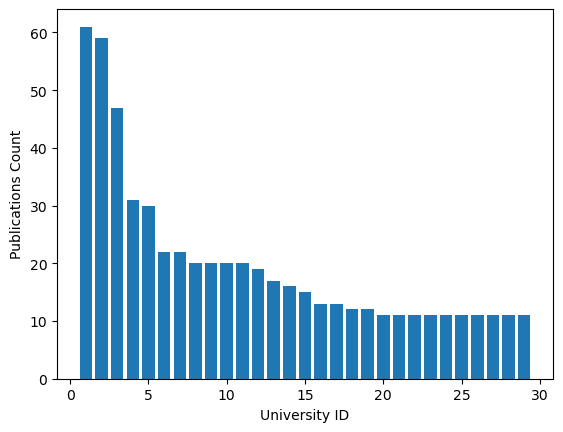

In [15]:
plt.bar(data0['id'], data0['publicationsCount'])
plt.xlabel('University ID')
plt.ylabel('Publications Count')
plt.show()